In [57]:
from qiskit import * 
import math as math 
from IPython.display import Image
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector

# Gates 
- X,Y,Z,H,I,S,T,U,R: Some of the gates in quantum.
STATE REPRESENTATION:
$$ |q\rangle = cos(\frac{\theta}{2})|0\rangle + e^{i\phi}sin(\frac{\theta}{2})|1\rangle$$
- The above is the general state of a qubit and gates are the <b>operations that change a qubit between these gates</b>
- These gates are always <b> reversible</b> 
- They are actually represented as matrices and correspond to a <b> rotation</b> on the Bloch Sphere.
- <b> I know about X,Y,Z gates and won't really go again through them</b>
$$ X, Y and Z \ represent\ rotation\ of\ \pi\ radians\ of\ the\ qubit\ by\ the\ x-axis\, y-axis\ and\ z-axis\ respectively.$$

### The X, Y and Z basis
- X gate has no effect on its eigen vectors which are actually |+> and |-> states 
- Y gate has no effect on its eigen vectors.
- Z gate has no effect on its eigen vectors which are |0> and |1> 
- **But these operators can't change the initialised states |0> and |1> to any other state or the superposition of them, they can just interchange them**


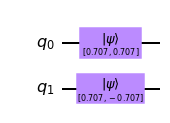

In [33]:
# verifying |+> and |-> are eigen vectors of X 
q = QuantumCircuit(2)
plus = [1/math.sqrt(2),1/math.sqrt(2)] 
minus = [1/math.sqrt(2),-1/math.sqrt(2)] 
q.initialize(plus,0)
q.initialize(minus,1)
q.draw(output='mpl')

Plotting the bloch Representation


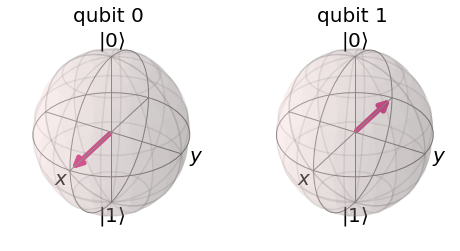

In [34]:
print("Plotting the bloch Representation")
plot_bloch_multivector(execute(q,backend = Aer.get_backend("statevector_simulator")).result().get_statevector())

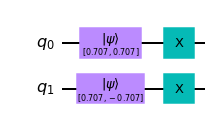

In [35]:
q.x(0)
q.x(1)
q.draw(output='mpl')

Plotting the bloch Representation again
So yes, they are the eigenvectors with values +1 and -1


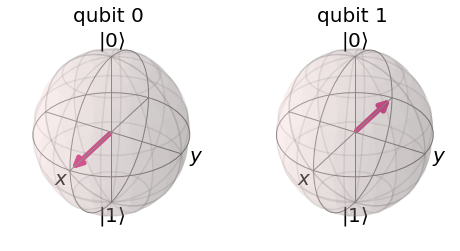

In [37]:
print("Plotting the bloch Representation again")
print("So yes, they are the eigenvectors with values +1 and -1")
plot_bloch_multivector(execute(q,backend = Aer.get_backend("statevector_simulator")).result().get_statevector())

## Hadamard Gate
- Creates an equal superposition of the qubits |0> and |1>
- H|0> = |+> 
- H|1> = |-> 
- It is thought of as a rotation along the bloch vector [1,0,1] or the line between <b> X and the Z axis</b>
-  H-gate as the outer products of vectors |0⟩, |1⟩, |+⟩ and |−⟩:
    - ANSWER : 1/sqrt(2)(|0><0| + |0><1| + |1><0| - |1><1|)
### HZH is actually equivalent to applying the X gate 

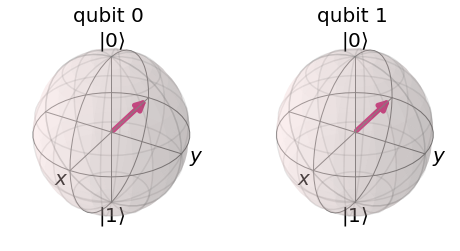

In [50]:
# working of HZH -> 
q = QuantumCircuit(2)
state = minus 
q.initialize(minus,0)
q.initialize(minus,1)
vector = execute(q,backend = Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(vector)

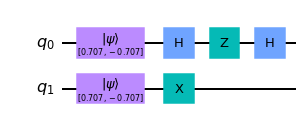

In [51]:
# applying HZH to the qubit 0 
q.h(0)
q.z(0)
q.h(0)
# applying X to qubit 1
q.x(1)
q.draw(output = 'mpl')

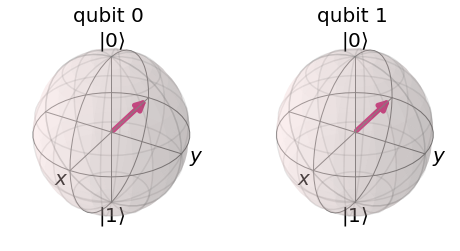

In [52]:
# seeing results
vector = execute(q,backend = Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(vector)

### So yes, it is same!

## Changes in basis
- Measurement can always be done in **any basis**
- It is important to note that if we have a quantum state, it is perfectly reasonable to ask the question about the probability of measruring that state in |+> or |->.
### BUT
- *Whatever state our quantum system is in, there is always a measurement that has a deterministic outcome.*
- For example, if we put our qubit in the state |0⟩, our measurement in the Z-basis is certain to be |0⟩ 
, but our measurement in the X-basis is completely random.

### $$R_{\phi}\ Gate$$
- It just a gate with the rotation of phi radians about the z-axis.
- It is just :
$$\begin{bmatrix} 1\ 0 \\0\  e^{i\phi} \end{bmatrix} $$
    - where phi is real

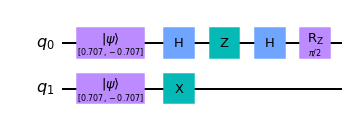

In [53]:
# specified by 
q.rz(math.pi/2,0)
q.draw(output='mpl')

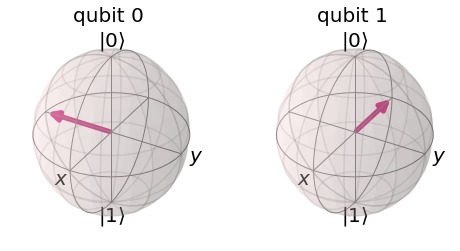

In [55]:
# seeing results
# pi/2 rotated vector , towards the -ve y direction
vector = execute(q,backend = Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(vector)

## S and T gates 
- These are just variants of the general R phi gate 
- <b> S gate : </b> rotation of +90 deg about Z axis again.
- <b> T gate : </b> rotation of +45 deg about the Z axis again.
### NOTE
<b> S GATEs and T GATEs are NOT UNITARY !</b>

## The most general gates 
- <b> U gates are the most general gates that are present in quantum </b>
- The U3 gate is the most general of them all
- Every gate can actually be specified as a U3 gate.
- Before running on real IBM quantum hardware, all single-qubit operations are compiled down to U1, U2 and U3. For this reason they are sometimes called the <b>physical gates.</b>
- It is specified as below- 

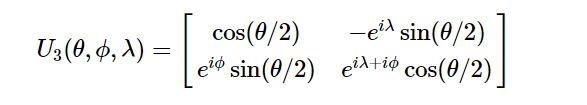

In [58]:
Image("u3.JPG")